<a href="https://colab.research.google.com/github/Viraj-Rana008/Deep-Learning/blob/main/fastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install -Uqq fastbook
from fastbook import *
# setup_book()
from fastai.vision.widgets import *

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x):
  return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

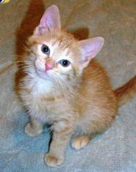

In [ ]:
img = PILImage.create(image_cat())
img.to_thumb(172)

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
uploader = SimpleNamespace(data = ['/content/1_pFQZxtxjUj6KWw-rxomA6Q.png'])

In [ ]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.016632


#Bear Classifier

In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', 'f786a751fbb548a48d8afa39350bf30d')

In [ ]:
search_images_bing

<function fastbook.search_images_bing>

###Downloadig Images Way--I

In [ ]:
results = search_images_bing(key, 'teddy bear')
imgs = results.attrgot('contentUrl')

print(len(imgs))
print("URL: ", imgs[1])     # url-link to bear image

dest = 'images/grizzy.jpg'
download_url(imgs[10], dest)

img = Image.open(dest)
img.to_thumb(200, 200)

###Downloading Images Way-II

200
https://cdn.audleytravel.com/-/-/79/160033025091139069040022125202060038124167252088.jpg


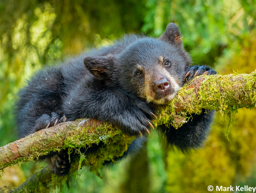

In [ ]:
urls = search_images_ddg('black bear', max_images=200)

print(len(urls))
print(urls[2])

dest = 'images/bear.jpg'
download_url(urls[159], dest)

img = Image.open(dest)
img.thumbnail((256,256))
img

In [2]:
bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears')

In [3]:
if not path.exists():
  path.mkdir()
  for bear_type in bear_types:
    dest = (path/bear_type)
    dest.mkdir(exist_ok=True)

    ## Way-I
    # results = search_images_bing(key, f'{bear_type} bear')
    # download_images(dest, urls=results.attrgot('contentUrl'))

    ## Way-II
    results = search_images_ddg(f'{bear_type} bear')
    download_images(dest, urls=results)

In [4]:
# Get path objects to all images
fns = get_image_files(path)
fns

(#573) [Path('bears/grizzly/00000052.jpg'),Path('bears/grizzly/00000115.jpg'),Path('bears/grizzly/00000108.jpg'),Path('bears/grizzly/00000131.jpg'),Path('bears/grizzly/00000195.jpg'),Path('bears/grizzly/00000194.jpg'),Path('bears/grizzly/00000158.jpg'),Path('bears/grizzly/00000189.jpg'),Path('bears/grizzly/00000064.jpg'),Path('bears/grizzly/00000039.jpg')...]

In [5]:
# Check for images which can't be opened
failed = verify_images(fns)
failed

(#3) [Path('bears/grizzly/00000038.jpg'),Path('bears/grizzly/00000145.jpg'),Path('bears/black/00000133.jpg')]

In [6]:
# Calls Path.unlink() function on all failed images (failed is a object)
failed.map(Path.unlink)

(#3) [None,None,None]

In [7]:
bears = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(128)
)

In [ ]:
dls = bears.dataloaders(path)

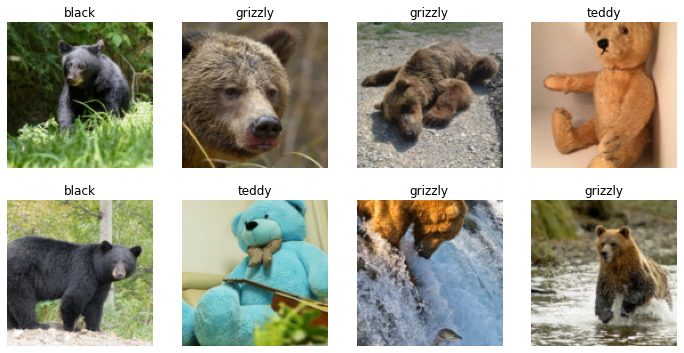

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

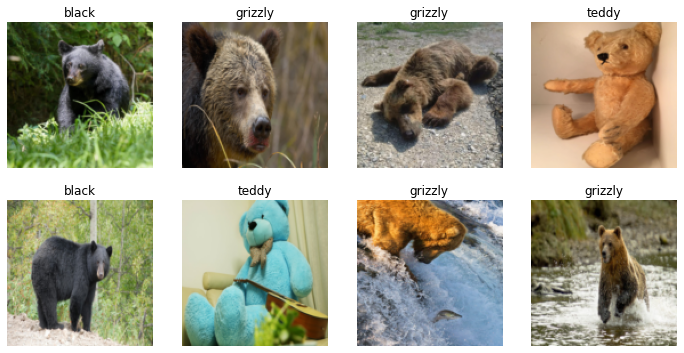

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2)

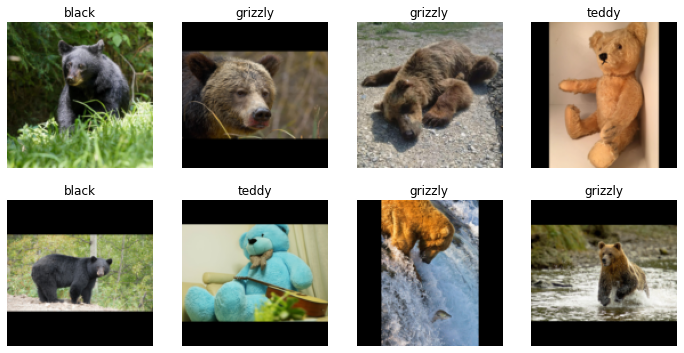

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2)

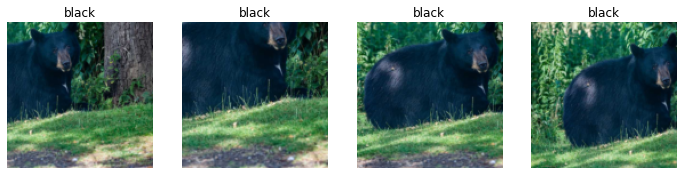

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

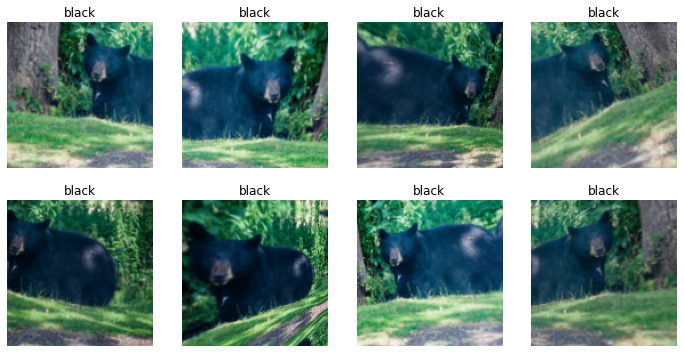

In [ ]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [8]:
# Prepare Final Data (Train-Valid)
bears = bears.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
                  batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

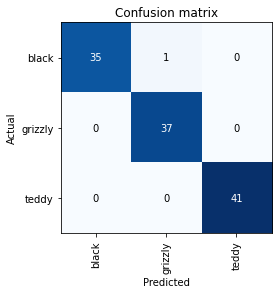

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

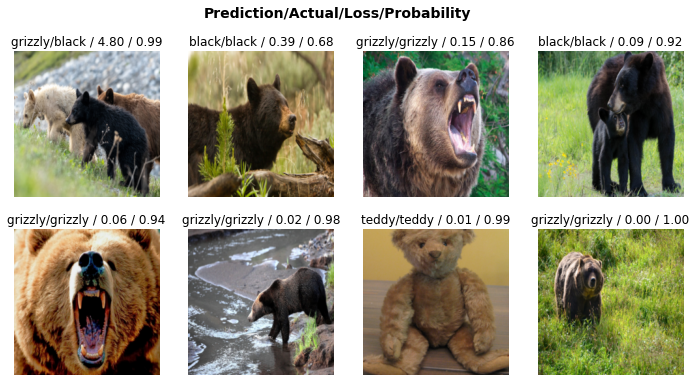

In [11]:
interp.plot_top_losses(8, nrows=2)

In [19]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [20]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [21]:
learn.export()

In [22]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [23]:
learn_inf = load_learner(path/'export.pkl')

In [26]:
learn_inf.predict('images.jpg')

('teddy', TensorBase(2), TensorBase([3.0408e-06, 1.6524e-04, 9.9983e-01]))

In [27]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [28]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [31]:
img = PILImage.create(btn_upload.data[-1])

In [32]:
disp = widgets.Output()
disp.clear_output()
with disp:
  display(img.to_thumb(128,128))
disp

Output()

In [33]:
pred, pred_idx, probs = learn_inf.predict(img)

In [34]:
label_pred = widgets.Label()
label_pred.value = f'Prediction: {pred};  Probability: {probs[pred_idx]:.04f}'
label_pred

Label(value='Prediction: black;  Probability: 1.0000')

In [35]:
btn_run = widgets.Button(description="Classify")
btn_run

Button(description='Classify', style=ButtonStyle())

In [36]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  
  disp.clear_output()
  with disp:
    display(img.to_thumb(128, 128))
  
  pred, pred_idx, probs = learn_inf.predict(img)

  label_pred.value = f'Prediction: {pred};   Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [37]:
VBox([widgets.Label('Select your Bear-'), btn_upload, btn_run, disp, label_pred])

In [ ]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila